In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv('additive_manufacturing_synthetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        167 non-null    float64
 1   wall_thickness      167 non-null    float64
 2   infill_density      167 non-null    int64  
 3   infill_pattern      167 non-null    object 
 4   nozzle_temperature  167 non-null    int64  
 5   bed_temperature     167 non-null    int64  
 6   print_speed         167 non-null    int64  
 7   material            167 non-null    object 
 8   fan_speed           167 non-null    int64  
 9   roughness           167 non-null    int64  
 10  tension_strength    167 non-null    int64  
 11  elongation          167 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 15.8+ KB


In [52]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include='number').columns.tolist()
print(f'Catergorical Columns: {cat_col}')
print('\n')
print(f'Numerical Columns: {num_col}')

Catergorical Columns: ['infill_pattern', 'material']


Numerical Columns: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strength', 'elongation']


In [53]:
df = pd.get_dummies(df, cat_col, drop_first=True, dtype='int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   layer_height              167 non-null    float64
 1   wall_thickness            167 non-null    float64
 2   infill_density            167 non-null    int64  
 3   nozzle_temperature        167 non-null    int64  
 4   bed_temperature           167 non-null    int64  
 5   print_speed               167 non-null    int64  
 6   fan_speed                 167 non-null    int64  
 7   roughness                 167 non-null    int64  
 8   tension_strength          167 non-null    int64  
 9   elongation                167 non-null    float64
 10  infill_pattern_honeycomb  167 non-null    int32  
 11  material_pla              167 non-null    int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 14.5 KB


In [54]:
df.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_honeycomb,material_pla
0,0.02,8.0,90,220,60,40,0,25,18,1.2,0,0
1,0.02,7.0,90,225,65,40,25,32,16,1.4,1,0
2,0.02,1.0,80,230,70,40,50,40,8,0.8,0,0
3,0.02,4.0,70,240,75,40,75,68,10,0.5,1,0
4,0.02,6.0,90,250,80,40,100,92,5,0.7,0,0


In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('material_pla', axis=1)
y = df['material_pla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21, stratify=y)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(transformers=[('num', StandardScaler(), num_col)],
                                   remainder='passthrough')

X_train_scaled = col_transformer.fit_transform(X_train)
X_test_scaled = col_transformer.transform(X_test)

In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.tolist())

X_train_scaled.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_honeycomb
0,0.857143,1.291175,1.069233,-0.754029,-0.764412,2.354754,0.009853,0.811520,1.379323,0.598027,0.0
1,-1.351501,-0.573967,0.439174,1.604096,0.686376,-0.847519,0.706881,-0.858671,-1.072621,-1.584322,1.0
2,-0.162231,-1.040252,0.402112,1.014565,0.351579,0.393362,0.706881,-0.133871,1.044967,-0.486197,0.0
3,-1.181605,-0.174294,1.069233,-1.016043,-0.987610,0.553476,-1.384204,-1.467923,-0.181005,0.848233,0.0
4,0.517352,1.923991,-0.190885,-0.098994,1.913966,-0.847519,1.403910,-0.081349,-0.849717,-0.597400,1.0


In [58]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns.tolist())
X_test_scaled.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_honeycomb
0,-1.011710,-0.507355,0.142676,-0.754029,-0.876011,-0.847519,-0.687176,0.076216,-0.403909,-0.917107,0.0
1,-1.011710,-0.374130,-0.227947,-0.098994,-0.541214,0.393362,1.403910,-1.142288,-0.961169,-0.527898,1.0
2,-1.351501,0.092155,1.180420,2.259131,1.244372,-0.847519,1.403910,-0.606567,-1.629881,-1.306316,0.0
3,0.857143,-0.907028,0.995108,0.294027,-0.987610,-0.046951,-1.384204,0.443868,1.490775,1.612750,1.0
4,0.177560,0.325298,-0.969192,1.145572,-0.652813,-0.767462,0.706881,-0.049836,-1.184073,-1.403618,0.0


In [59]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

In [60]:
logreg = LogisticRegression()
sgd = SGDClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rfm = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
xgb = XGBClassifier()
nb = GaussianNB()

classifier_models = [[logreg,'Logistic Regression'],
                     [sgd,'Stochastic Gradient Descent'],
                     [dtc,'Decision Tree'],[svc,'Support Vector Machine'],
                     [rfm,'Random Forest Classifier'],
                     [knn,'K Nearest Neighbors'],
                     [xgb, 'XGBoost Classifier'],
                     [nb,'Naive Bayes']
         ]

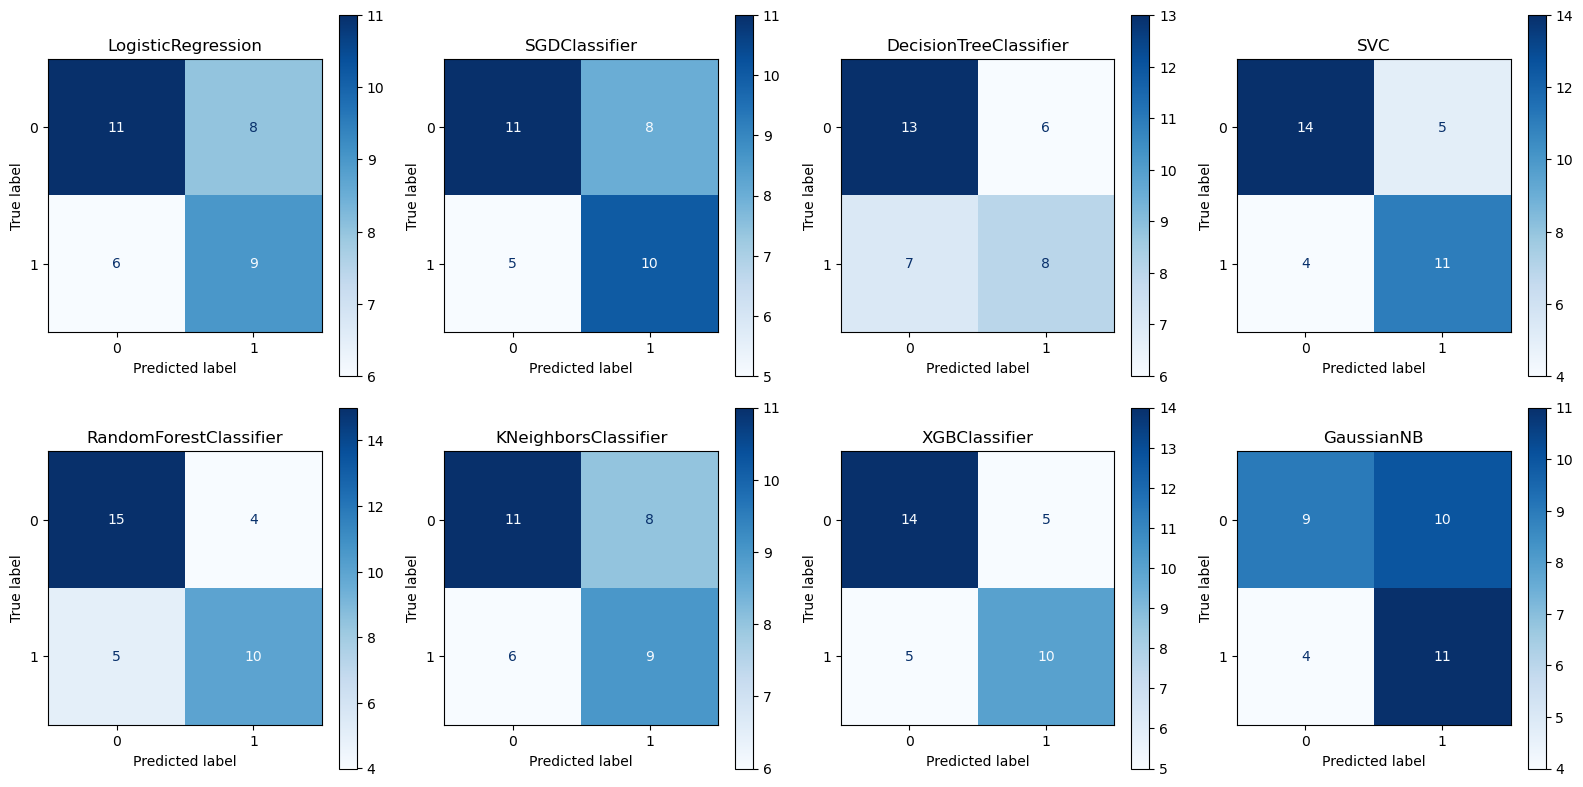

In [61]:
def classifier_model(model_c, ax):
    classifier = model_c
    classifier.fit(X_train_scaled, y_train)
    y_pred_classifier = classifier.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_classifier, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    
    disp.plot(ax=ax, cmap="Blues")
    ax.set_title(model_c.__class__.__name__) 

fig, axes = plt.subplots(2, 4, figsize=(16, 8))


for ax, (model, name) in zip(axes.flatten(), classifier_models):
    classifier_model(model, ax)

plt.tight_layout()

In [62]:
for i, j in classifier_models:
    i.fit(X_train_scaled, y_train)
    y_pred_classifier = i.predict(X_test_scaled)
    print(f'Classification Report of the model {j}: \n {classification_report(y_test, y_pred_classifier)}')

Classification Report of the model Logistic Regression: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.53      0.60      0.56        15

    accuracy                           0.59        34
   macro avg       0.59      0.59      0.59        34
weighted avg       0.60      0.59      0.59        34

Classification Report of the model Stochastic Gradient Descent: 
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.52      0.73      0.61        15

    accuracy                           0.59        34
   macro avg       0.61      0.60      0.59        34
weighted avg       0.62      0.59      0.58        34

Classification Report of the model Decision Tree: 
               precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.53      0.53      0.53        15

    ac

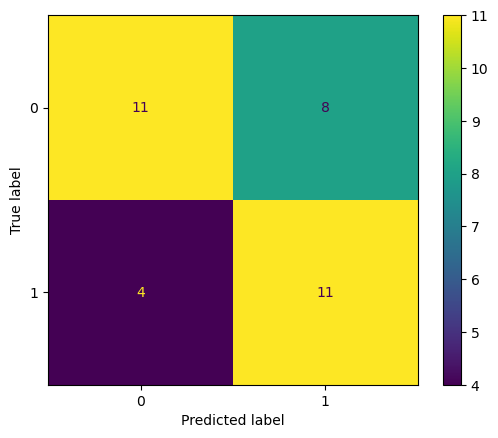

In [63]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred2 = knn2.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred2, labels=knn2.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn2.classes_)
cmd.plot()

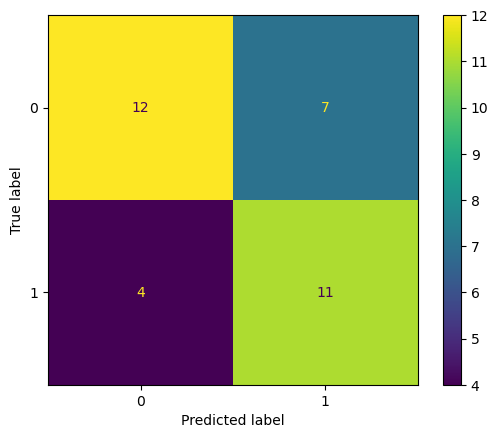

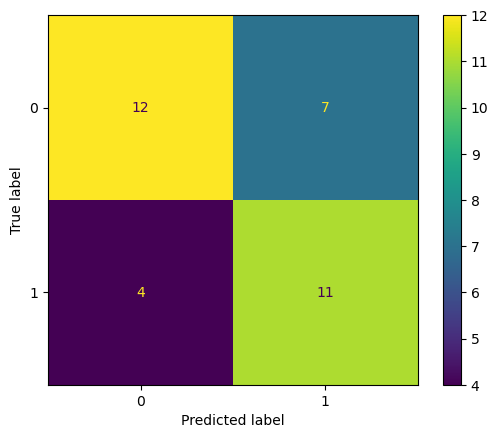

In [64]:
for algorithm in ['ball_tree', 'kd_tree']:
    knn2 = KNeighborsClassifier(n_neighbors=5, weights = 'distance',algorithm=algorithm)
    knn2.fit(X_train_scaled, y_train)
    y_pred2 = knn2.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred2, labels=knn2.classes_)
    cmd = ConfusionMatrixDisplay(cm, display_labels=knn2.classes_)
    cmd.plot()

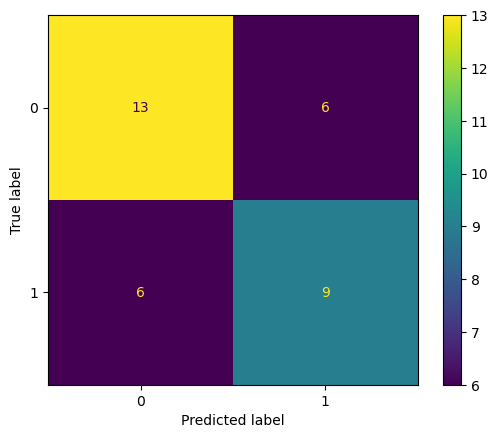

In [66]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights = 'distance',metric='manhattan')
knn2.fit(X_train_scaled, y_train)
y_pred2 = knn2.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred2, labels=knn2.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn2.classes_)
cmd.plot()

Text(0.5, 1.0, 'Elbow Method for Optimal k')

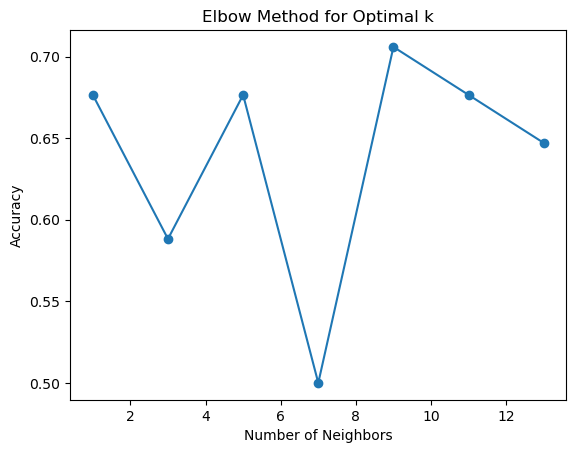

In [67]:
from sklearn.metrics import accuracy_score

accuracies = []
neighbors = np.arange(1, 15, 2)
for k in neighbors:
    knn3 = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn3.fit(X_train_scaled, y_train)
    y_pred3 = knn3.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test,y_pred3))
    

    
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')




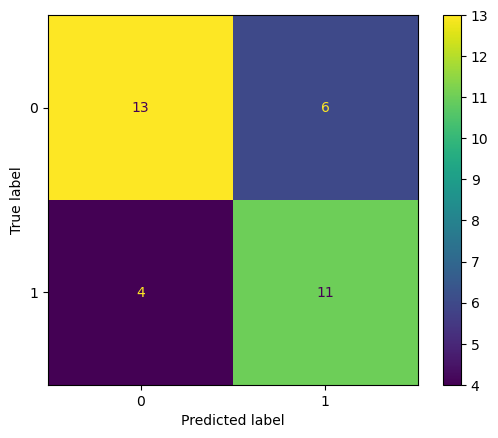

In [68]:
knn4 = KNeighborsClassifier(n_neighbors=9, weights = 'distance')
knn4.fit(X_train_scaled, y_train)
y_pred4 = knn4.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred4, labels=knn2.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn2.classes_)
cmd.plot()

In [70]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
knn_kf = KNeighborsClassifier(n_neighbors=5)
score_kf = cross_val_score(knn_kf, X_train_scaled, y_train, cv=kf, scoring='accuracy')

score_kf

array([0.59259259, 0.77777778, 0.66666667, 0.42307692, 0.5       ])

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.67      0.67      0.67        15

    accuracy                           0.71        34
   macro avg       0.70      0.70      0.70        34
weighted avg       0.71      0.71      0.71        34



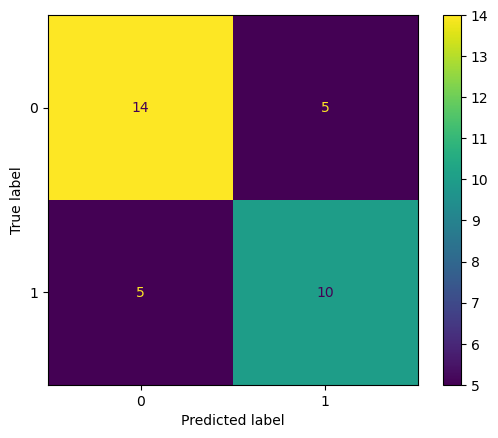

In [71]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_predXGB = xgb.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predXGB)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
print(classification_report(y_test, y_predXGB))

# Tuning XGBoost Classifier

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.71      0.67      0.69        15

    accuracy                           0.74        34
   macro avg       0.73      0.73      0.73        34
weighted avg       0.73      0.74      0.73        34



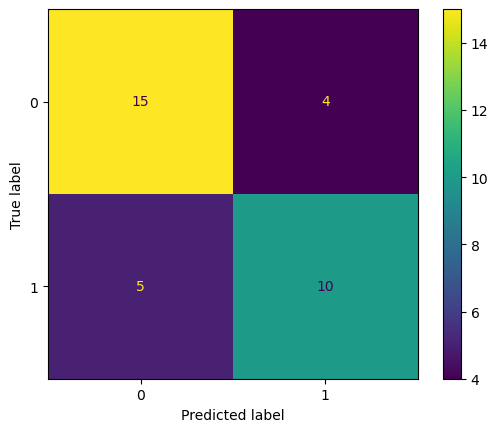

In [72]:
xgbT = XGBClassifier(objective='binary:logistic', booster='gbtree', eta=0.1, learning_rate=0.1, max_depth=5)
xgbT.fit(X_train_scaled, y_train)
y_predXGBT = xgbT.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predXGBT)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
print(classification_report(y_test, y_predXGBT))

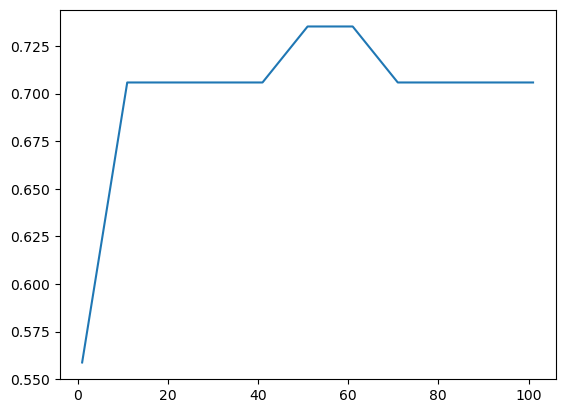

In [73]:
accuracies_n = []
for n in np.arange(1, 110, 10):
    xgbT = XGBClassifier(objective='binary:logistic', 
                         booster='gbtree', 
                         eta=0.1, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         n_estimators=n)
    xgbT.fit(X_train_scaled, y_train)
    y_predXGBT = xgbT.predict(X_test_scaled)
    accuracies_n.append(accuracy_score(y_test, y_predXGBT))
    #cm = confusion_matrix(y_test, y_predXGBT)
    #cmd = ConfusionMatrixDisplay(cm)
    #cmd.plot()
plt.plot(np.arange(1, 110, 10), accuracies_n)

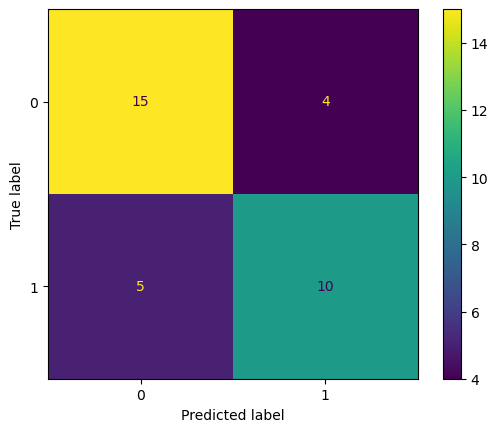

In [75]:
 xgbT = XGBClassifier(objective='binary:logistic', 
                         booster='gbtree', 
                         eta=0.1, 
                         learning_rate=0.1, 
                         max_depth=5)
xgbT.fit(X_train_scaled, y_train)
y_predXGBT = xgbT.predict(X_test_scaled)
accuracies_n.append(accuracy_score(y_test, y_predXGBT))
cm = confusion_matrix(y_test, y_predXGBT)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

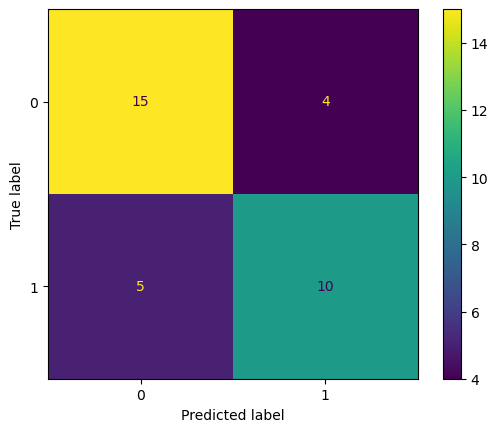

In [76]:
xgb_D = XGBClassifier(objective='binary:logistic', 
                         booster='gbtree', 
                         eta=1.0, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         n_estimators=60,
                         colsample_bytree=1.0)

xgb_D.fit(X_train_scaled, y_train)
y_predXGB_D = xgb_D.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predXGB_D)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

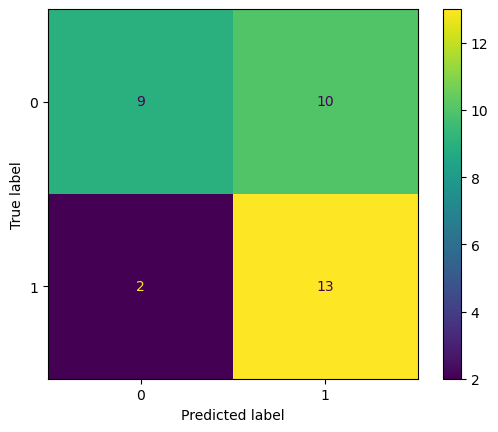

In [79]:
from sklearn.svm import SVC, LinearSVC

svc = SVC(kernel='linear', C=1.0,gamma='scale',class_weight='balanced',decision_function_shape='ovr',random_state=21)

svc.fit(X_train_scaled, y_train)
y_predSVC = svc.predict(X_test_scaled)
cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predSVC))
cmd.plot()

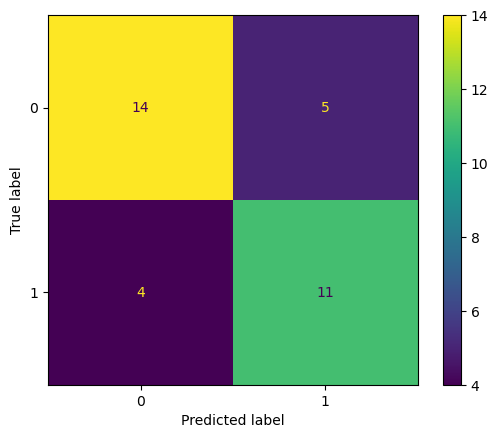

In [89]:
svc = SVC(kernel='rbf', C=10,class_weight='balanced',decision_function_shape='ovr',random_state=21)

svc.fit(X_train_scaled, y_train)
y_predSVC = svc.predict(X_test_scaled)
cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predSVC))
cmd.plot()